In [138]:
## import dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from citipy import citipy
from keys import api_key
from pprint import pprint


In [139]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [140]:
## Create blank Data Frame with city names
city_weather_df = pd.DataFrame({'City':cities})
city_weather_df['Lat'] = ''
city_weather_df['Long'] = ''
city_weather_df['Max Temp'] = ''
city_weather_df['Humidity'] = ''
city_weather_df['Cloudiness'] = ''
city_weather_df['Wind Speed'] = ''
city_weather_df['Country'] = ''
city_weather_df['Date'] = ''


In [141]:
## list to store cities not found
not_cities = []

## define the base url for api request
city_url = 'http://api.openweathermap.org/data/2.5/weather?q='

## for loop to iterate through city names to gather weather data
for index, row in city_weather_df.iterrows():
    city_name = row['City']
    response = requests.get(f'{city_url}{city_name}&appid={api_key}&units=imperial').json()
    
    ## Get weather data from json file and store in Data Frame created above
    try:
        print(f'processing record {index} of {len(cities)} | {city_name}')
        city_weather_df.loc[index, 'Lat'] = response['coord']['lat']
        city_weather_df.loc[index, 'Long'] = response['coord']['lon']
        city_weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        city_weather_df.loc[index, 'Country'] = response['sys']['country']
        city_weather_df.loc[index, 'Date'] = response['dt']
        
    
    ## If there is no weather data for the city, print message and add to list of not_cities
    except KeyError:
        print(f'{city_name} not found...skipping')
        not_cities.append(city_name)


processing record 0 of 639 | umzimvubu
umzimvubu not found...skipping
processing record 1 of 639 | kharovsk
processing record 2 of 639 | atuona
processing record 3 of 639 | amderma
amderma not found...skipping
processing record 4 of 639 | shakawe
processing record 5 of 639 | tidore
tidore not found...skipping
processing record 6 of 639 | carnarvon
processing record 7 of 639 | camana
processing record 8 of 639 | eureka
processing record 9 of 639 | illoqqortoormiut
illoqqortoormiut not found...skipping
processing record 10 of 639 | jamestown
processing record 11 of 639 | cape town
processing record 12 of 639 | nemuro
processing record 13 of 639 | cidreira
processing record 14 of 639 | port alfred
processing record 15 of 639 | lavrentiya
processing record 16 of 639 | okandja
okandja not found...skipping
processing record 17 of 639 | mataura
processing record 18 of 639 | gat
processing record 19 of 639 | tvrdonice
processing record 20 of 639 | constantine
processing record 21 of 639 | tukt

processing record 190 of 639 | porto santo
processing record 191 of 639 | havoysund
processing record 192 of 639 | rundu
processing record 193 of 639 | gurskoye
gurskoye not found...skipping
processing record 194 of 639 | puerto carreno
processing record 195 of 639 | lerwick
processing record 196 of 639 | novosheshminsk
processing record 197 of 639 | victoria
processing record 198 of 639 | clyde river
processing record 199 of 639 | daigo
processing record 200 of 639 | camopi
processing record 201 of 639 | nikolskoye
processing record 202 of 639 | vysokogornyy
processing record 203 of 639 | saldanha
processing record 204 of 639 | malwan
malwan not found...skipping
processing record 205 of 639 | oliveira dos brejinhos
processing record 206 of 639 | kununurra
processing record 207 of 639 | jalu
processing record 208 of 639 | evensk
processing record 209 of 639 | inza
processing record 210 of 639 | vestmannaeyjar
processing record 211 of 639 | trairi
processing record 212 of 639 | bethel
p

processing record 384 of 639 | rawson
processing record 385 of 639 | fenoarivo
processing record 386 of 639 | pasni
processing record 387 of 639 | isangel
processing record 388 of 639 | mao
processing record 389 of 639 | vallenar
processing record 390 of 639 | esperance
processing record 391 of 639 | nishihara
processing record 392 of 639 | marawi
processing record 393 of 639 | gorin
processing record 394 of 639 | pacora
processing record 395 of 639 | necochea
processing record 396 of 639 | qostanay
processing record 397 of 639 | zhuhai
processing record 398 of 639 | fukue
processing record 399 of 639 | luanda
processing record 400 of 639 | gazojak
processing record 401 of 639 | dubbo
processing record 402 of 639 | namibe
processing record 403 of 639 | boyolangu
processing record 404 of 639 | yerofey pavlovich
processing record 405 of 639 | port-gentil
processing record 406 of 639 | aswan
processing record 407 of 639 | ayan
processing record 408 of 639 | sao lourenco do sul
processing 

processing record 581 of 639 | batesville
processing record 582 of 639 | la palma
processing record 583 of 639 | villa bruzual
processing record 584 of 639 | pingliang
processing record 585 of 639 | paamiut
processing record 586 of 639 | makaleng
processing record 587 of 639 | ahipara
processing record 588 of 639 | umea
processing record 589 of 639 | kandi
processing record 590 of 639 | kingaroy
processing record 591 of 639 | mae hong son
processing record 592 of 639 | kaseda
processing record 593 of 639 | toktogul
processing record 594 of 639 | zmeinogorsk
processing record 595 of 639 | marsh harbour
processing record 596 of 639 | przasnysz
processing record 597 of 639 | huayang
processing record 598 of 639 | beloha
processing record 599 of 639 | sao filipe
processing record 600 of 639 | ambovombe
processing record 601 of 639 | mpika
processing record 602 of 639 | nizhneangarsk
processing record 603 of 639 | hovd
processing record 604 of 639 | workington
processing record 605 of 639 |

In [156]:
## Clean up data from json and store in new variable - clean_weather_df
clean_weather_df = city_weather_df.replace(r'^\s*$', np.nan, regex=True)
clean_weather_df = clean_weather_df.dropna(axis=0,how='any')
clean_weather_df.count()

City          593
Lat           593
Long          593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [155]:
## Export data to csv file
clean_weather_df.to_csv('../Output/weather_data.csv',index=False)

In [144]:
## display summary statistics for clean_weather_df
clean_weather_df.describe(include=[np.number])

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,19.087749,17.010561,55.356054,72.005059,49.102867,8.773153,1.615607e+09
std,32.922714,89.033795,26.373821,19.921764,38.804881,6.391632,7.236451e+01
min,-54.800000,-179.166700,-20.200000,3.000000,0.000000,0.540000,1.615606e+09
25%,-8.118100,-63.598600,38.410000,62.000000,4.000000,4.120000,1.615607e+09
50%,22.075200,21.548200,62.920000,75.000000,48.000000,7.360000,1.615607e+09
75%,46.030300,88.397200,76.300000,88.000000,90.000000,11.500000,1.615607e+09
max,78.218600,179.316700,94.950000,100.000000,100.000000,44.870000,1.615607e+09


In [145]:
## seperate humid cities from ideal cities and display summary statistics for humid cities
humid_city_df = clean_weather_df.loc[clean_weather_df['Humidity']>=100]
ideal_city_df = clean_weather_df.loc[clean_weather_df['Humidity']<100]
humid_city_df.describe(include=[np.number])

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,1.400000e+01
mean,37.020057,-9.532471,46.630714,100.0,64.785714,6.720000,1.615607e+09
std,22.664284,90.475843,8.718554,0.0,31.056223,4.990292,5.557180e+01
min,-34.532200,-131.646100,32.000000,100.0,1.000000,1.010000,1.615607e+09
25%,34.870875,-90.345825,41.752500,100.0,52.500000,2.300000,1.615607e+09
50%,38.784400,18.623950,50.000000,100.0,75.000000,6.330000,1.615607e+09
75%,44.607775,30.860100,51.950000,100.0,90.000000,9.017500,1.615607e+09
max,62.632300,140.350000,59.000000,100.0,90.000000,17.270000,1.615607e+09


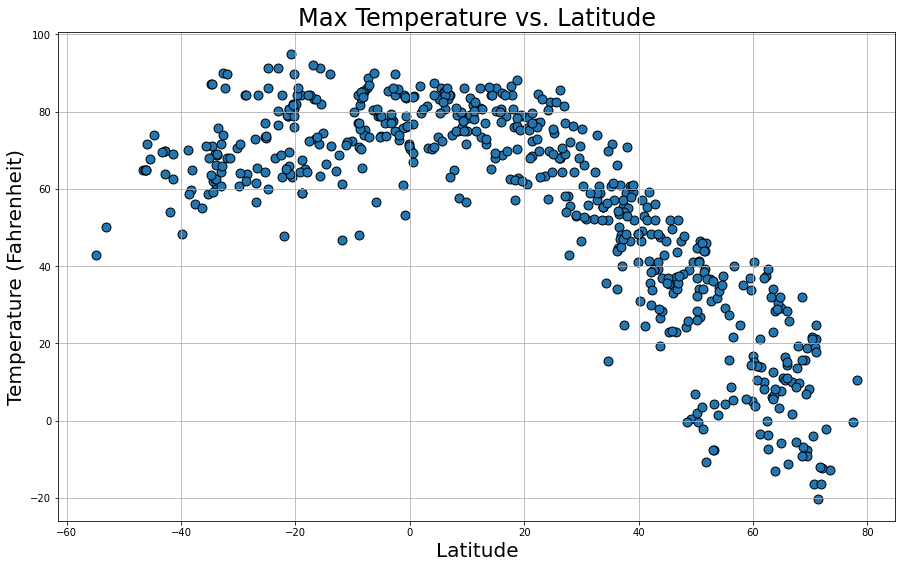

In [146]:
## Temperature (F) vs. Latitude
temp = ideal_city_df['Max Temp']
lat = ideal_city_df['Lat']

## Plot data
plt.figure(figsize=(15,9))
plt.scatter(lat,temp,s=80,edgecolors='black')
plt.title('Max Temperature vs. Latitude',fontsize = 24)
plt.ylabel('Temperature (Fahrenheit)',fontsize = 20)
plt.xlabel('Latitude',fontsize=20)
plt.grid(which='major')


plt.show()



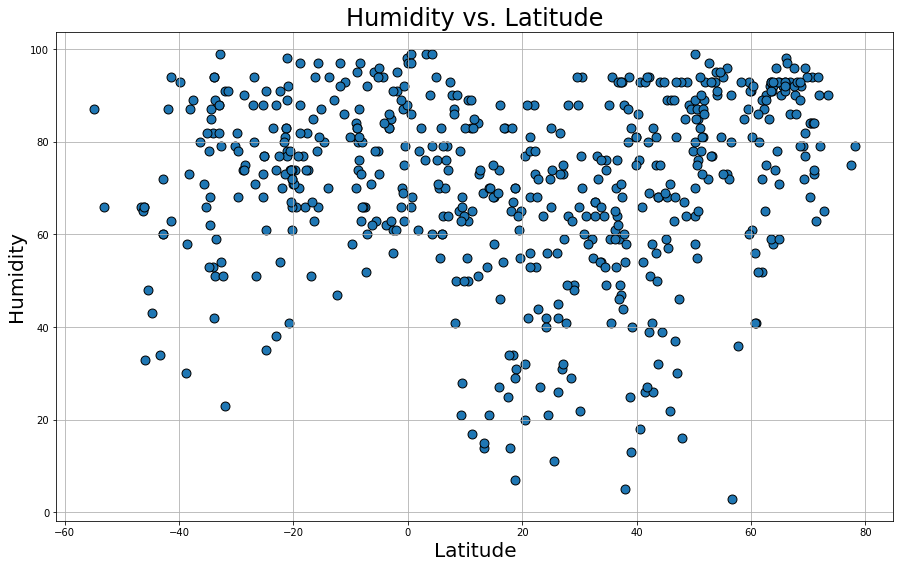

In [147]:
## Humidity (%) vs. Latitude

hum = ideal_city_df['Humidity']
lat = ideal_city_df['Lat']

## plot data
plt.figure(figsize=(15,9))
plt.scatter(lat, hum,s=80,edgecolors='black')
plt.title('Humidity vs. Latitude',fontsize = 24)
plt.ylabel('Humidity',fontsize = 20)
plt.xlabel('Latitude',fontsize=20)
plt.grid(which='major')

plt.show()

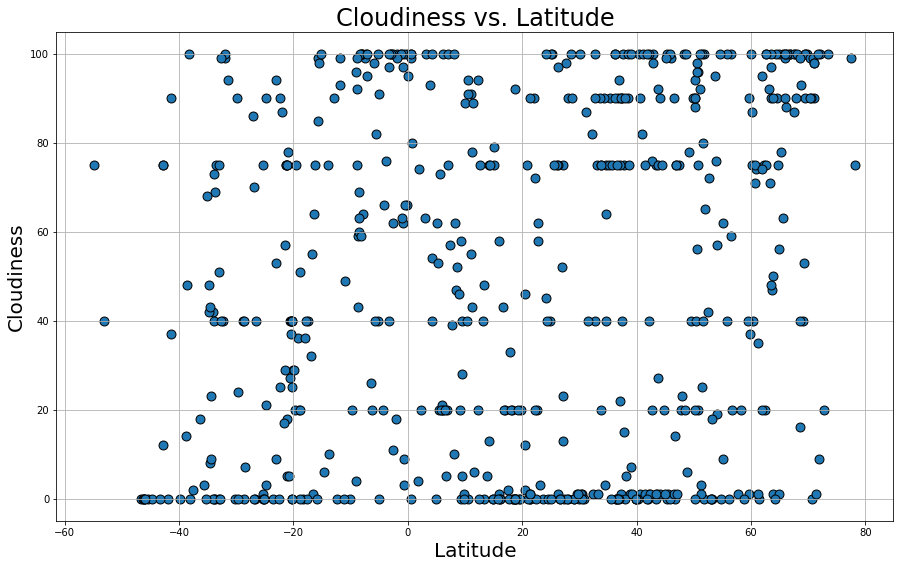

In [148]:
## Cloudiness (%) vs. Latitude

cloud = ideal_city_df['Cloudiness']
lat = ideal_city_df['Lat']

## plot data
plt.figure(figsize=(15,9))
plt.scatter(lat,cloud,s=80,edgecolors='black')
plt.title('Cloudiness vs. Latitude',fontsize = 24)
plt.ylabel('Cloudiness',fontsize = 20)
plt.xlabel('Latitude',fontsize=20)
plt.grid(which='major')

plt.show()

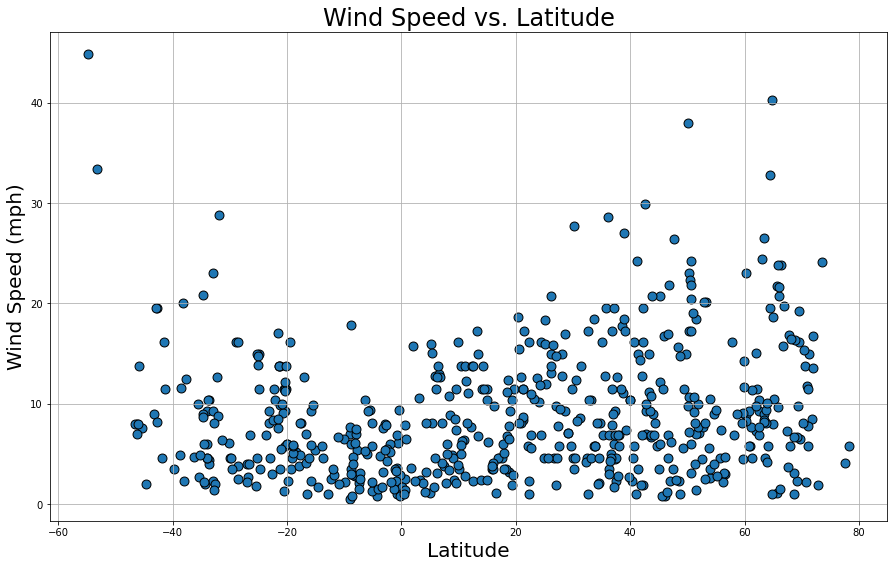

In [149]:
## Wind Speed (mph) vs. Latitude

wind = ideal_city_df['Wind Speed']
lat = ideal_city_df['Lat']

## plot data
plt.figure(figsize=(15,9))
plt.scatter(lat,wind,s=80,edgecolors='black')
plt.title('Wind Speed vs. Latitude',fontsize = 24)
plt.ylabel('Wind Speed (mph)',fontsize = 20)
plt.xlabel('Latitude',fontsize=20)
plt.grid(which='major')

plt.show()

In [150]:
## Seperate cities into new data frames for nothern and southern hemispheres
northern_hem = clean_weather_df.loc[clean_weather_df['Lat']>=0]
southern_hem = clean_weather_df.loc[clean_weather_df['Lat']<0]

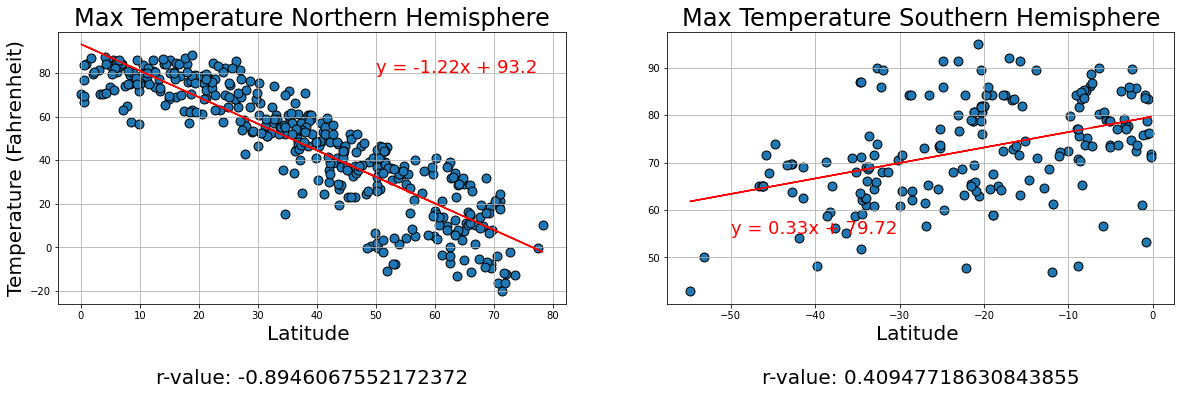

In [151]:
## Hemisphere Temperature (F) vs. Latitude

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))


## Northern Hemisphere - Temperature (F) vs. Latitude
## variables
north_temp = northern_hem['Max Temp']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, nrvalue, pvalue, stderr) = st.linregress(north_lat, north_temp)
temp1_regress_values = (slope * north_lat) + intercept
ntemp_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on left subplot
ax1.scatter(north_lat,north_temp,s=80,edgecolors='black')
ax1.plot(north_lat,temp1_regress_values,color='red')
ax1.annotate(ntemp_line_eq,(50,80),fontsize=18,color="red")
ax1.set_title('Max Temperature Northern Hemisphere',fontsize = 24)
ax1.set_ylabel('Temperature (Fahrenheit)',fontsize = 20)
ax1.set_xlabel(f'Latitude \n\nr-value: {nrvalue}',fontsize=20)
ax1.grid(which='major')


## Southern Hemisphere - Temperature (F) vs. Latitude
## variables
south_temp = southern_hem['Max Temp']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, srvalue, pvalue, stderr) = st.linregress(south_lat, south_temp)
temp2_regress_values = (slope * south_lat) + intercept
stemp_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on right subplot
ax2.scatter(south_lat,south_temp,s=80,edgecolors='black')
ax2.plot(south_lat,temp2_regress_values,color='red')
ax2.annotate(stemp_line_eq,(-50,55),fontsize=18,color="red")
ax2.set_title('Max Temperature Southern Hemisphere',fontsize = 24)
ax2.set_xlabel(f'Latitude \n\nr-value: {srvalue}',fontsize=20)
ax2.grid(which='major')

## Print correlation coefficient


plt.show()

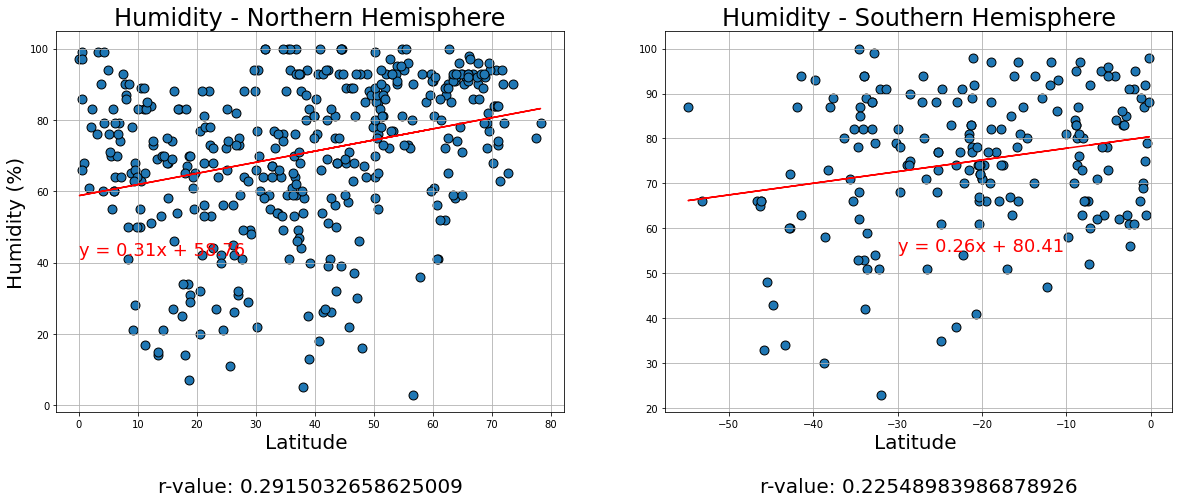

In [152]:
## Northern Hemisphere - Humidity (%) vs. Latitude

## Define Figure 2
fig2, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))

## variables
north_hum = northern_hem['Humidity']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, nrvalue, pvalue, stderr) = st.linregress(north_lat, north_hum)
hum1_regress_values = (slope * north_lat) + intercept
nhum_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on left subplot
ax1.scatter(north_lat,north_hum,s=80,edgecolors='black')
ax1.plot(north_lat,hum1_regress_values,color='red')
ax1.annotate(nhum_line_eq,(0,42),fontsize=18,color="red")
ax1.set_title('Humidity - Northern Hemisphere',fontsize = 24)
ax1.set_ylabel('Humidity (%)',fontsize = 20)
ax1.set_xlabel(f'Latitude \n\nr-value: {nrvalue}',fontsize=20)
ax1.grid(which='major')

## Southern Hemisphere - Humidity (%) vs. Latitude
## variables
south_hum = southern_hem['Humidity']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, srvalue, pvalue, stderr) = st.linregress(south_lat, south_hum)
hum2_regress_values = (slope * south_lat) + intercept
shum_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on right subplot
ax2.scatter(south_lat,south_hum,s=80,edgecolors='black')
ax2.plot(south_lat,hum2_regress_values,color='red')
ax2.annotate(shum_line_eq,(-30,55),fontsize=18,color="red")
ax2.set_title('Humidity - Southern Hemisphere',fontsize = 24)
ax2.set_xlabel(f'Latitude \n\nr-value: {srvalue}',fontsize=20)
ax2.grid(which='major')

plt.show()


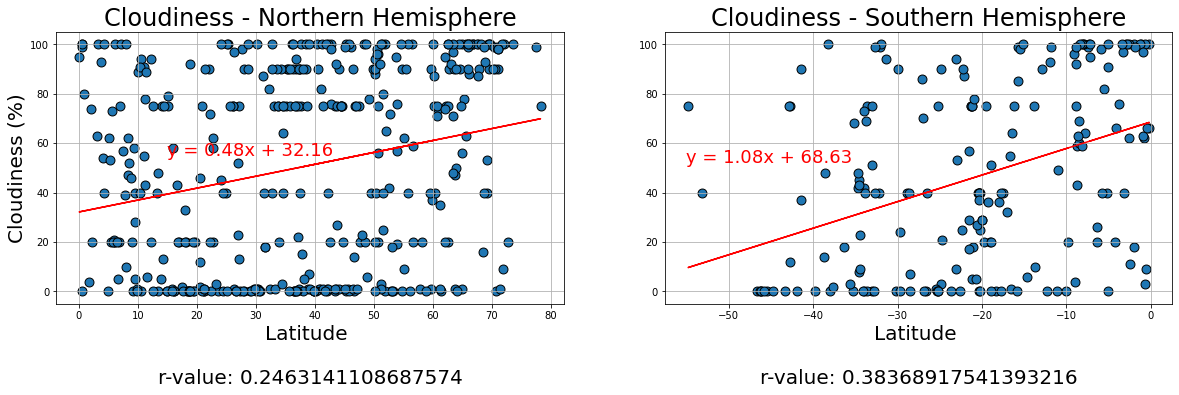

In [153]:
## Northern Hemisphere - Cloudiness (%) vs. Latitude

## Define Figure for subplots
fig3, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

## variables
north_cloud = northern_hem['Cloudiness']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, nrvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
cloud1_regress_values = (slope * north_lat) + intercept
ncloud_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on left subplot
ax1.scatter(north_lat,north_cloud,s=80,edgecolors='black')
ax1.plot(north_lat,cloud1_regress_values,color='red')
ax1.annotate(ncloud_line_eq,(15,55),fontsize=18,color="red")
ax1.set_title('Cloudiness - Northern Hemisphere',fontsize = 24)
ax1.set_ylabel('Cloudiness (%)',fontsize = 20)
ax1.set_xlabel(f'Latitude \n\nr-value: {nrvalue}',fontsize=20)
ax1.grid(which='major')

## Southern Hemisphere - Cloudiness (%) vs. Latitude
## variables
south_cloud = southern_hem['Cloudiness']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, srvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
cloud2_regress_values = (slope * south_lat) + intercept
scloud_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on right subplot
ax2.scatter(south_lat,south_cloud,s=80,edgecolors='black')
ax2.plot(south_lat,cloud2_regress_values,color='red')
ax2.annotate(scloud_line_eq,(-55,52),fontsize=18,color="red")
ax2.set_title('Cloudiness - Southern Hemisphere',fontsize = 24)
ax2.set_xlabel(f'Latitude \n\nr-value: {srvalue}',fontsize=20)
ax2.grid(which='major')

plt.show()



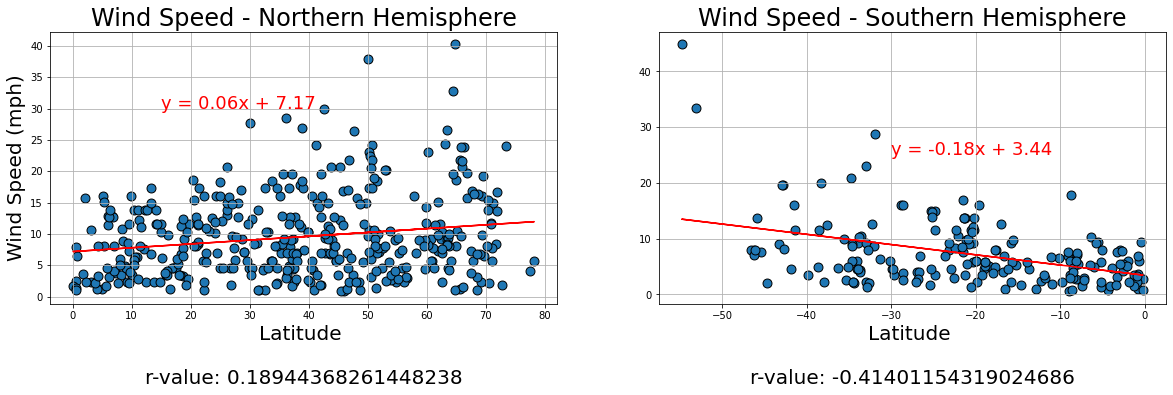

In [154]:
## Northern Hemisphere - Wind Speed (mph) vs. Latitude

## Define Figure 4 for subplots
fig4, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

## variables
north_wind = northern_hem['Wind Speed']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, nrvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
wind1_regress_values = (slope * north_lat) + intercept
nwind_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on left subplot
ax1.scatter(north_lat,north_wind,s=80,edgecolors='black')
ax1.plot(north_lat,wind1_regress_values,color='red')
ax1.annotate(nwind_line_eq,(15,30),fontsize=18,color="red")
ax1.set_title('Wind Speed - Northern Hemisphere',fontsize = 24)
ax1.set_ylabel('Wind Speed (mph)',fontsize = 20)
ax1.set_xlabel(f'Latitude \n\nr-value: {nrvalue}',fontsize=20)
ax1.grid(which='major')

## Southern Hemisphere - Wind Speed (mph) vs. Latitude
## variables
south_wind = southern_hem['Wind Speed']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, srvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
wind2_regress_values = (slope * south_lat) + intercept
swind_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on right subplot
ax2.scatter(south_lat,south_wind,s=80,edgecolors='black')
ax2.plot(south_lat,wind2_regress_values,color='red')
ax2.annotate(swind_line_eq,(-30,25),fontsize=18,color="red")
ax2.set_title('Wind Speed - Southern Hemisphere',fontsize = 24)
ax2.set_xlabel(f'Latitude \n\nr-value: {srvalue}',fontsize=20)
ax2.grid(which='major')

plt.show()

